### lazy flood fill

In [ ]:
import sys
print(sys.getrecursionlimit())

387420489


In [ ]:
sys.setrecursionlimit(9**9)

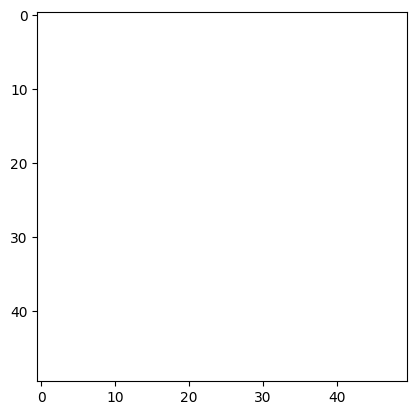

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def lazy_flood_fill(size, fill_ratio, num_iterations):
    # Generate a random initial state with a given fill ratio
    state = np.zeros((size, size), dtype=int)

    for i in range(size):
        for j in range(size):
            if random.random() < fill_ratio:
                state[i, j] = 1

    # Apply the Lazy Flood Fill algorithm
    for _ in range(num_iterations):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        fill_value = random.randint(0, 1)

        if state[x, y] != fill_value:
            stack = [(x, y)]
            target_value = state[x, y]

            while stack:
                x, y = stack.pop()

                if state[x, y] == target_value:
                    state[x, y] = fill_value

                    if x > 0:
                        stack.append((x-1, y))
                    if x < size-1:
                        stack.append((x+1, y))
                    if y > 0:
                        stack.append((x, y-1))
                    if y < size-1:
                        stack.append((x, y+1))

    return state

# Example usage
size = 50
fill_ratio = 0.4
num_iterations = 500

pattern = lazy_flood_fill(size, fill_ratio, num_iterations)

# Display the generated pattern
plt.imshow(pattern, cmap='binary')
plt.show()

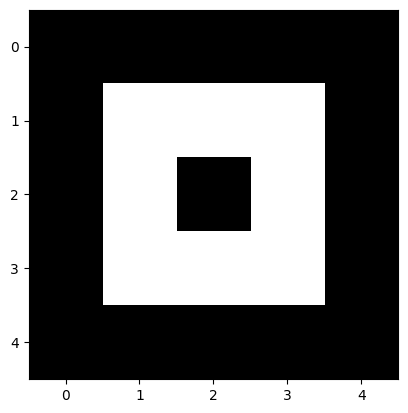

In [ ]:
def flood_fill(grid, start_x, start_y, target_color, replacement_color):
    if target_color == replacement_color:
        return

    rows = len(grid)
    cols = len(grid[0])

    stack = [(start_x, start_y)]

    while stack:
        x, y = stack.pop()

        if grid[x][y] != target_color:
            continue

        grid[x][y] = replacement_color

        if x > 0:
            stack.append((x - 1, y))
        if x < rows - 1:
            stack.append((x + 1, y))
        if y > 0:
            stack.append((x, y - 1))
        if y < cols - 1:
            stack.append((x, y + 1))

# Example usage:
grid = [
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

start_x = 2
start_y = 2
target_color = 0
replacement_color = 2

flood_fill(grid, start_x, start_y, target_color, replacement_color)

# Print the result
plt.imshow(grid, cmap='binary')
plt.show()

In [ ]:
print(np.array(pattern))

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


### Cellular automation

In [ ]:
import numpy as np

In [ ]:
m1=np.array([[0,1],[0,1]])
m2=np.array([[1,1],[1,0]])

print(m1)
print(m2)

# [1, 0]
# [1, 0]

[[0 1]
 [0 1]]
[[1 1]
 [1 0]]


In [ ]:
m2 = np.logical_not(np.equal(m1, m2)).astype(int)*m2
m2

array([[1, 0],
       [1, 0]])

In [ ]:
result = np.maximum(m1*2, m2)

In [ ]:
result

array([[1, 2],
       [1, 2]])

In [ ]:
map2*2

array([[2, 0],
       [2, 0]])

In [ ]:
np.concatenate((m1,m2))

array([[0, 1],
       [0, 1],
       [1, 1],
       [1, 0]])

In [ ]:
import numpy as np

set1 = np.array([1, 2, 3, 4])
set2 = np.array([3, 4, 5, 6])

newarr = np.setdiff1d(set1, set2, assume_unique=True)

print(newarr)

[1 2]


In [ ]:
random.random()

0.5922196802219114

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_initial_state(size, fill_ratio):
    # Create a random initial state with a given fill ratio
    initial_state = np.zeros((size, size), dtype=int)

    for i in range(size):
        for j in range(size):
            if random.random() < fill_ratio:
                initial_state[i, j] = 1

    return initial_state

def apply_rule(state, rule):
    # Apply the given rule to update the state
    new_state = np.zeros_like(state)

    for i in range(1, state.shape[0] - 1):
        for j in range(1, state.shape[1] - 1):
            neighbors = state[i-1:i+2, j-1:j+2]
            new_state[i, j] = rule(neighbors)

    return new_state

def rule(neighbors):
    # Define the rule for updating a cell based on its neighbors
    center_cell = neighbors[1, 1]
    alive_neighbors = np.sum(neighbors) - center_cell

    if center_cell == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

def cellular_automata(size, fill_ratio, num_steps):
    # Generate a cellular automata using the given parameters
    state = generate_initial_state(size, fill_ratio)

    for _ in range(num_steps):
        state = apply_rule(state, rule)

    return state

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


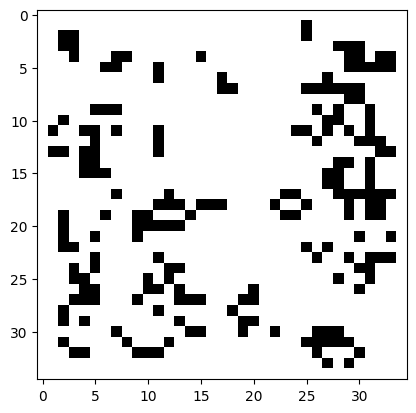

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


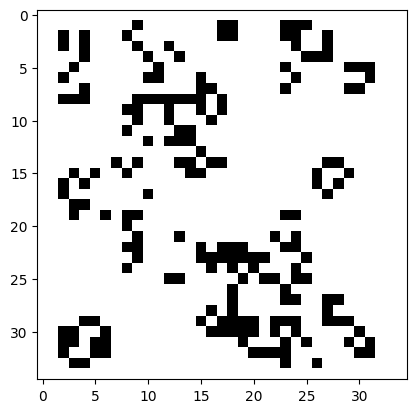

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


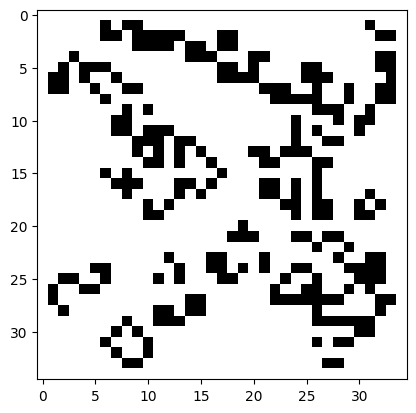

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


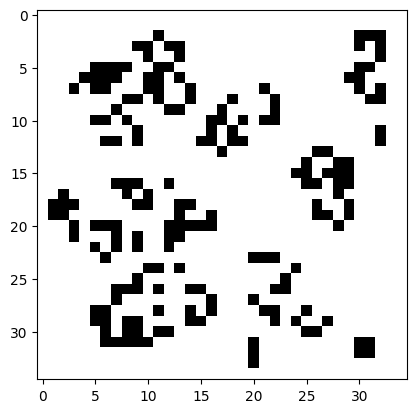

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


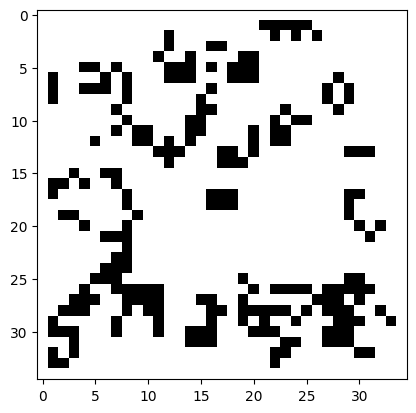

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


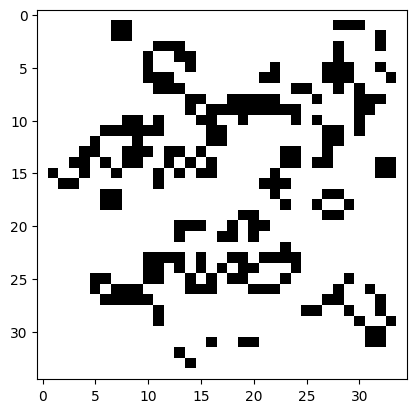

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


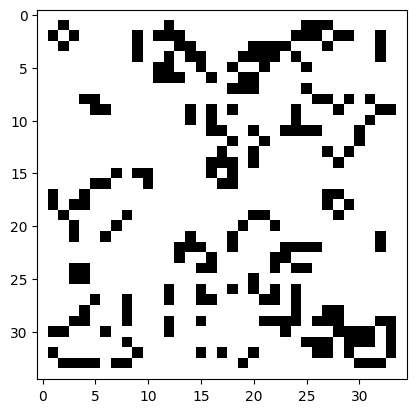

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


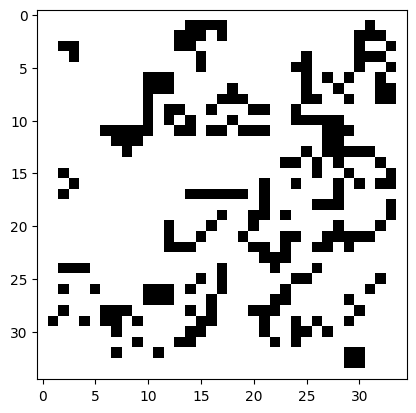

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


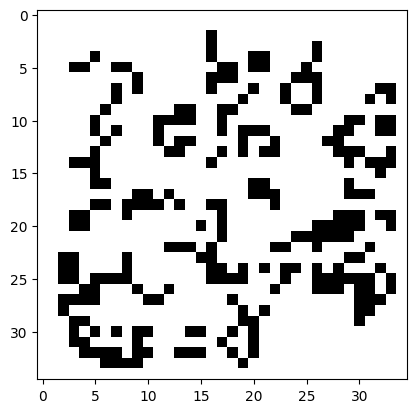

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


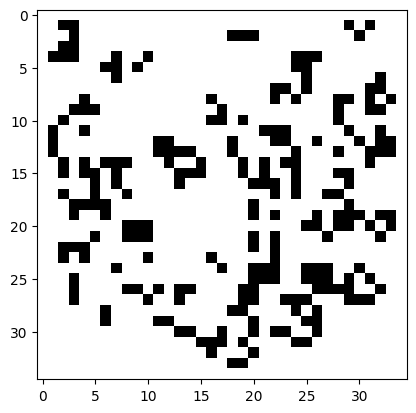

In [ ]:
size = 35
fill_ratio = 0.4
num_steps = 10

for _ in range(10):
  automata = cellular_automata(size, fill_ratio, num_steps)

  # Display the generated cellular automata
  print(automata)
  plt.imshow(automata, cmap='binary')
  plt.show()

### Diamond square

[[ 0.73443994  0.67791011  0.52840869  0.82330061  0.95604777  0.65468986
   0.85343296  0.17332014  0.11209233]
 [ 0.28468454  0.71802518  0.63606079  0.90138281  0.75975089  0.74552648
   0.75985593  0.55039276  0.        ]
 [ 0.56190086  0.35794587  0.73635319  0.96617492  0.93217008  0.83033457
   0.39769681  0.11252882  0.        ]
 [ 0.02741498  0.21821983  0.13324894  0.4471326   0.17447872  0.34339734
   0.09915407 -0.01611469  0.        ]
 [ 0.14442285  0.14033506 -0.19050307 -0.02271383 -0.33573933  0.05350866
   0.22685722  0.31886446  0.        ]
 [ 0.22050905  0.47152853  0.0313458  -0.15176572  0.12650478 -0.0500783
   0.0330173   0.28828711  0.        ]
 [ 0.84777772  0.46955312  0.44878339  0.28758629  0.32340161  0.22611624
   0.13868908  0.04970859  0.        ]
 [ 0.3865629   0.59706255  0.5408674   0.29430479  0.11310449  0.06675078
   0.20715205  0.0369607   0.        ]
 [ 0.8565518   0.          0.          0.          0.          0.
   0.          0.          0.48

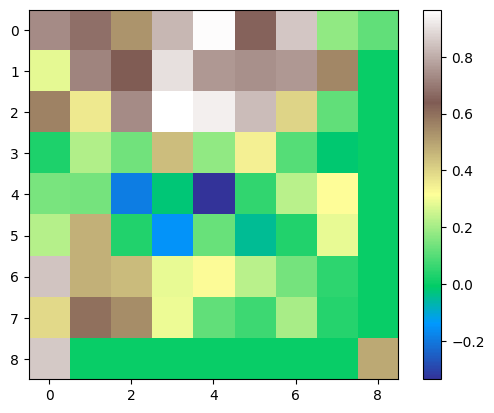

In [ ]:
def diamond_square(size, roughness):
    # Initialize the height map
    height_map = [[0.0] * size for _ in range(size)]

    # Set the corner values
    height_map[0][0] = random.uniform(0, 1)
    height_map[0][size-1] = random.uniform(0, 1)
    height_map[size-1][0] = random.uniform(0, 1)
    height_map[size-1][size-1] = random.uniform(0, 1)

    step_size = size - 1
    scale = 1.0

    while step_size > 1:
        half_step = step_size // 2

        # Diamond step
        for y in range(0, size - 1, step_size):
            for x in range(0, size - 1, step_size):
                average = (
                    height_map[y][x] +
                    height_map[y][x + step_size] +
                    height_map[y + step_size][x] +
                    height_map[y + step_size][x + step_size]
                ) / 4.0

                height_map[y + half_step][x + half_step] = average + random.uniform(-scale, scale)

        # Square step
        for y in range(0, size - 1, half_step):
            for x in range((y + half_step) % step_size, size - 1, step_size):
                average = (
                    height_map[(y - half_step) % size][x] +
                    height_map[(y + half_step) % size][x] +
                    height_map[y][(x - half_step) % size] +
                    height_map[y][(x + half_step) % size]
                ) / 4.0

                height_map[y][x] = average + random.uniform(-scale, scale)

        step_size //= 2
        scale *= roughness

    return height_map

# Example usage
size = 9
roughness = 0.5

terrain = diamond_square(size, roughness)

# Print the generated terrain
print(np.array(terrain))
plt.imshow(terrain, cmap='terrain')
plt.colorbar()
plt.show()

### noise

In [ ]:
!pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-linux_x86_64.whl size=56275 sha256=d59c79cad87c934d1aa9d07fb6c943b7352b01ca8ed4a18f522fbb6c423f7a9d
  Stored in directory: /root/.cache/pip/wheels/b2/01/64/ca2f6ed556c204d5ce2d3719a58757a5504aeb5525654692d0
Successfully built noise


In [ ]:
import noise
import numpy as np
import matplotlib.pyplot as plt

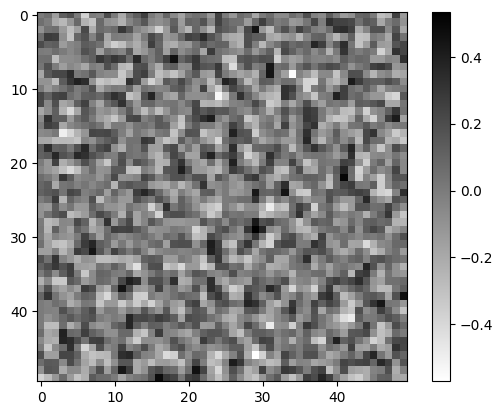

In [ ]:

# Definir los parámetros del mapa
map_width = 50
map_height = 50
scale = 20.0
octaves = 2
persistence = 0.5
lacunarity = 2.0

# Generar una matriz de ruido de Perlin
world_map = np.zeros((map_height, map_width))
for y in range(map_height):
    for x in range(map_width):
        nx = x / map_width - 0.5
        ny = y / map_height - 0.5
        world_map[y][x] = noise.pnoise2(nx * scale, ny * scale, octaves=octaves,
                                        persistence=persistence, lacunarity=lacunarity, repeatx=map_width, repeaty=map_height,
                                        base=0)

# Visualizar el mapa generado
plt.imshow(world_map, cmap='binary')
plt.colorbar()
plt.show()